# Definindo as Importações e as Funções 

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#import qgrid



# Importando nossos DataSets

Neste momento importamos os DataSets contendo os coeficientes de Fourier médios sobre linhas em três direções das imagens, 
horizontal, vertical e diagonal, onde cada coluna é uma feature. As features representam os coeficientes de Fourier,
ou a potência daquela determinada frequência. Neste DataSet, temos 794 amostras de 15 espécies e 753 features, uma vez que a transformada de cada direção das linhas gera um vetor de tamanho 251.
    
Os nomes das colunas se dão por freqHor[i], freqVer[i], freqDia[i] onde i varia de 1~251. Sendo assim, é uma matriz de dados de 
794×754.

In [3]:
df1=pd.read_csv('dataFrame_Todas_Frequencias_1_limpo.csv',index_col=0)
df2=pd.read_csv('dataFrame_Todas_Frequencias_2_limpo.csv',index_col=0)
df3=pd.read_csv('dataFrame_Todas_Frequencias_3_limpo.csv',index_col=0)
dfFinal= pd.concat([df1,df2,df3])
dfFinal = dfFinal.reset_index()
dfFinal = dfFinal.drop(columns=['index'])

In [4]:
#:~ este é o nosso DataSet
dfFinal 

,especie,freqHor0,freqHor1,freqHor2,freqHor3,freqHor4,freqHor5,freqHor6,freqHor7,freqHor8,...,freqDia241,freqDia242,freqDia243,freqDia244,freqDia245,freqDia246,freqDia247,freqDia248,freqDia249,freqDia250
0,Agonandra_brasiliensis,5.629027,3.263345,2.963647,2.556337,2.504938,2.365321,2.140245,1.913196,2.004430,...,-0.604036,-0.012007,0.172639,0.137903,0.515985,0.789282,0.263135,0.233077,0.510209,0.821385
1,Agonandra_brasiliensis,5.585465,3.306821,2.914541,2.564523,2.450643,2.350780,2.179681,2.068125,1.885966,...,0.416528,-0.125571,0.568743,0.225254,0.231311,-0.047272,0.188935,0.429728,0.489879,-0.734867
2,Agonandra_brasiliensis,5.325855,3.354700,3.183950,2.587785,2.454905,2.083075,1.860876,1.830547,1.749733,...,-0.163330,-0.125470,-0.574058,-0.533845,-0.737897,-0.550129,-0.706898,-0.436660,-0.961719,-1.263827
3,Agonandra_brasiliensis,5.414922,3.033500,3.137935,2.758751,2.229666,2.198093,2.085023,2.042390,1.970110,...,-0.555845,0.223436,-0.456101,-0.024228,-0.728225,-0.030841,-0.438352,-0.221829,0.348311,-0.524509
4,Agonandra_brasiliensis,5.505692,2.892849,2.935129,2.430666,2.285328,2.289990,1.783138,1.795392,1.577741,...,-0.025987,-0.299945,0.055534,0.057664,0.206637,-0.426241,-0.257766,-0.672838,-0.202598,0.038376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Xylopia_aromatica,4.891627,2.118984,2.253198,2.259031,2.067337,1.934353,1.849679,2.148775,1.977729,...,0.829862,0.407451,0.218301,0.526383,0.115371,0.251804,0.726743,0.073887,-0.278838,0.239653
790,Xylopia_aromatica,4.423476,1.918421,1.807120,1.766082,1.736988,1.708228,1.697307,1.758673,1.566158,...,0.345081,0.273235,-0.381064,0.319517,0.258127,0.589819,0.291833,-0.711431,0.020789,-0.683139
791,Xylopia_aromatica,4.377365,1.920764,1.723769,1.640462,1.707134,1.642546,1.706597,1.710042,1.525250,...,-0.180388,-0.596790,-0.270262,-1.558304,0.366859,0.048385,-0.243910,-0.798921,-0.193673,-0.121297
792,Xylopia_aromatica,4.835106,2.564674,2.104945,2.130617,1.935598,1.959248,2.209817,2.439128,2.159336,...,0.565714,0.209653,0.308247,-0.044684,-0.393826,0.706915,0.566372,0.109758,-0.435342,0.804789


In [11]:
pera_index = dfFinal[dfFinal['especie']=='Pera_obovata'].index.tolist()
pouteria_index = dfFinal[dfFinal['especie']=='Pouteria torta'].index.tolist()
    

In [24]:
pera_sample = dfFinal.loc[417][1:252].values
pouteria_sample = dfFinal.loc[519][1:252].values

In [23]:
pera_index

[417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468]

Text(0.5, 0, 'Frequência')

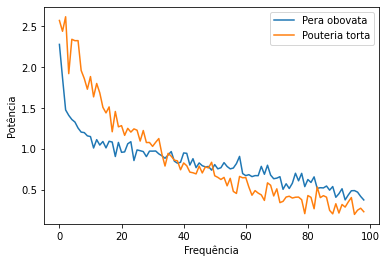

In [37]:
plt.plot(pera_sample[1:100])
plt.plot(pouteria_sample[1:100])
plt.legend(['Pera obovata', 'Pouteria torta'])
plt.ylabel('Potência')
plt.xlabel('Frequência')

In [ ]:
pouteria_sample = dfFinal.loc[436][1:252].values

In [77]:
pouteria_index = dfFinal[dfFinal['especie']=='Pouteria torta'].index.to_list
  

In [78]:
pouteria_index

<bound method IndexOpsMixin.tolist of Int64Index([469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
            482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
            495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
            508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
            521, 522],
           dtype='int64')>

In [79]:
pouteria_sample = dfFinal.loc[516][1:252].values

In [ ]:
pltpouteria_sample

In [4]:
pd.unique(dfFinal['especie'])

array(['Agonandra_brasiliensis', 'Annona_crassiflora',
       'Bowdichia_virgilioides', 'Diospyros_burchelli',
       'Erythroxylum_suberosum', 'Himatanthus_obovatus',
       'Kielmeyera_coriacea', 'Magonia_pubescens', 'Pera_obovata',
       'Pouteria torta', 'Pouteria_ramiflora', 'Roupala_montana',
       'Salvertia_convalariodora', 'Vataeria_macrocarpa',
       'Xylopia_aromatica'], dtype=object)

# Processando os PC's

Aqui iremos processar os Componentes Principais da matriz dos dados. Neste primeiro experimento, não iremos diferenciar os componentes principais de cada direção, e sim todas as features como um todo. Dessa forma, iremos gerar 10 componentes principais, apenas.

In [5]:
#:~ gera o nome das colunas que representarão as features no dataset

################################################
################################################
nome_colunas_Hor = []                         ##
i=0                                           ##
while i < 251:                                ##
    nome_colunas_Hor.append('freqHor'+str(i)) ##
    i = i+1                                   ##
################################################
################################################
nome_colunas_Ver = []                         ##
i=0                                           ##
while i < 251:                                ##
    nome_colunas_Ver.append('freqVer'+str(i)) ##
    i = i+1                                   ##
################################################
################################################
nome_colunas_Dia = []                         ##
i=0                                           ##
while i < 251:                                ##
    nome_colunas_Dia.append('freqDia'+str(i)) ##
    i = i+1                                   ##
################################################
################################################

In [6]:
#:~  primeiro dividimos nosso DataSet em X e y, tal que X representa as features e y é o nosso target, ou seja,
#:~  o nome das espécies de árvores

X_pca = dfFinal[nome_colunas_Hor+ nome_colunas_Ver+ nome_colunas_Dia]
y_pca = dfFinal['especie']

In [7]:
X_pca

,freqHor0,freqHor1,freqHor2,freqHor3,freqHor4,freqHor5,freqHor6,freqHor7,freqHor8,freqHor9,...,freqDia241,freqDia242,freqDia243,freqDia244,freqDia245,freqDia246,freqDia247,freqDia248,freqDia249,freqDia250
0,5.629027,3.263345,2.963647,2.556337,2.504938,2.365321,2.140245,1.913196,2.004430,1.827091,...,-0.604036,-0.012007,0.172639,0.137903,0.515985,0.789282,0.263135,0.233077,0.510209,0.821385
1,5.585465,3.306821,2.914541,2.564523,2.450643,2.350780,2.179681,2.068125,1.885966,1.894266,...,0.416528,-0.125571,0.568743,0.225254,0.231311,-0.047272,0.188935,0.429728,0.489879,-0.734867
2,5.325855,3.354700,3.183950,2.587785,2.454905,2.083075,1.860876,1.830547,1.749733,1.587057,...,-0.163330,-0.125470,-0.574058,-0.533845,-0.737897,-0.550129,-0.706898,-0.436660,-0.961719,-1.263827
3,5.414922,3.033500,3.137935,2.758751,2.229666,2.198093,2.085023,2.042390,1.970110,1.867345,...,-0.555845,0.223436,-0.456101,-0.024228,-0.728225,-0.030841,-0.438352,-0.221829,0.348311,-0.524509
4,5.505692,2.892849,2.935129,2.430666,2.285328,2.289990,1.783138,1.795392,1.577741,1.509295,...,-0.025987,-0.299945,0.055534,0.057664,0.206637,-0.426241,-0.257766,-0.672838,-0.202598,0.038376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,4.891627,2.118984,2.253198,2.259031,2.067337,1.934353,1.849679,2.148775,1.977729,1.984150,...,0.829862,0.407451,0.218301,0.526383,0.115371,0.251804,0.726743,0.073887,-0.278838,0.239653
790,4.423476,1.918421,1.807120,1.766082,1.736988,1.708228,1.697307,1.758673,1.566158,1.615871,...,0.345081,0.273235,-0.381064,0.319517,0.258127,0.589819,0.291833,-0.711431,0.020789,-0.683139
791,4.377365,1.920764,1.723769,1.640462,1.707134,1.642546,1.706597,1.710042,1.525250,1.654415,...,-0.180388,-0.596790,-0.270262,-1.558304,0.366859,0.048385,-0.243910,-0.798921,-0.193673,-0.121297
792,4.835106,2.564674,2.104945,2.130617,1.935598,1.959248,2.209817,2.439128,2.159336,2.304804,...,0.565714,0.209653,0.308247,-0.044684,-0.393826,0.706915,0.566372,0.109758,-0.435342,0.804789


In [8]:
#:~ normalizamos os dados

X_pca = StandardScaler().fit_transform(X_pca)

In [9]:
#:~ criamos uma instância da análise por componentes principais gerando 10 pc's

pca = PCA(n_components=10)

In [10]:
#:~ computamos os pc's

X_PCA = pca.fit_transform(X_pca)

In [11]:
#:~ aqui geramos o array de nomes dos 10 pc's

################################################
PC_nome_colunas = []                          ##
i=0                                           ##
while i < 10:                                 ##
    PC_nome_colunas.append('pc'+str(i+1))     ##
    i = i+1                                   ##
################################################

#:~ criamos um novo DataSet com os 10 PC's
df_PC = pd.DataFrame(data=X_PCA,columns=[PC_nome_colunas])
#:~ inserimos novamente a coluna target com o nome das especies
df_PC.insert(0, 'especie', y_pca.values, allow_duplicates=True)

In [12]:
#:~ este é o nosso DataSet com os componentes principais
df_PC

,especie,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,Agonandra_brasiliensis,5.784834,31.840595,-6.923369,-4.225403,-2.666332,-3.308895,1.340769,1.715374,1.477212,-0.789079
1,Agonandra_brasiliensis,9.079318,20.306338,-0.133069,-0.757818,-2.409390,-2.603716,-0.255011,0.760279,0.540064,0.195022
2,Agonandra_brasiliensis,35.883657,29.161808,0.793962,-8.327787,4.197985,-5.011850,0.020803,2.144172,0.885357,-2.386313
3,Agonandra_brasiliensis,22.219797,26.444710,-1.380295,-3.774875,-0.882807,-3.202640,0.731539,1.367227,0.795603,0.503516
4,Agonandra_brasiliensis,29.429421,18.781788,-1.711147,-3.711845,0.342007,-5.311956,-0.400682,1.378735,1.072156,0.806449
...,...,...,...,...,...,...,...,...,...,...,...
789,Xylopia_aromatica,-7.485209,-0.138253,1.793916,2.477878,2.960956,1.189232,1.181247,0.728659,0.249364,-1.030214
790,Xylopia_aromatica,16.624202,-1.260732,-4.994699,0.747895,4.195266,3.535761,2.767943,1.188914,-1.932075,2.055289
791,Xylopia_aromatica,17.477286,-3.258715,-5.921780,1.226913,3.235302,2.542072,2.321449,2.423833,-0.052580,1.082668
792,Xylopia_aromatica,-10.285845,1.868588,1.031984,2.578005,1.323494,1.365835,2.726641,1.382596,-1.054261,-2.371145


# Fazendo a classificação

Neste momento iremos realizar a classificação dos dados de acordo com a análise discriminante de Fischer. Dividiremos o nosso DataSet em amostras de treinamento e amostras de teste, e procederemos com a predição e o cálculo de acurácia

In [13]:
#definindo X (amostra) e y (target)
#PC_nome_colunas_final = PC_nome_colunas_Hor + PC_nome_colunas_Ver + PC_nome_colunas_Dia
X = df_PC[['pc1',
                'pc2',
                'pc3',
                'pc4',
                'pc5',
                'pc6',
                'pc7',
                'pc8',
                #'pc9',
                #'pc10'
               ]]
y = df_PC[['especie']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=True,random_state=42)

lda = LinearDiscriminantAnalysis(n_components=3)

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test) #inicia o processo de teste
#print(np.array(y_pred == y_test)) #imprime o array de acertos comparando as predições com a real classificação das espécies
print('')
print('Porcentagem de acertos: ', 100*np.sum(y_pred == y_test)/len(y_test)) #calcula a porcentagem de acertos somando todos os
                                                                            #valores acertados pela máquina (np.sum) e dividindo pelo 
                                                                            #número de valores totais do teste 


Porcentagem de acertos:  76.1006289308176


# Nova Divisão por PC's

Agora iremos dividir os PC's de acordo com a direção sob a qual o espectro fora computado. Dessa forma teremos 30 features, sendo 10 componentes principais das médias das transformadas horizontais, verticais e diagonais.

In [14]:
#:~ ainda temos o DataSet das Frequências
dfFinal

,especie,freqHor0,freqHor1,freqHor2,freqHor3,freqHor4,freqHor5,freqHor6,freqHor7,freqHor8,...,freqDia241,freqDia242,freqDia243,freqDia244,freqDia245,freqDia246,freqDia247,freqDia248,freqDia249,freqDia250
0,Agonandra_brasiliensis,5.629027,3.263345,2.963647,2.556337,2.504938,2.365321,2.140245,1.913196,2.004430,...,-0.604036,-0.012007,0.172639,0.137903,0.515985,0.789282,0.263135,0.233077,0.510209,0.821385
1,Agonandra_brasiliensis,5.585465,3.306821,2.914541,2.564523,2.450643,2.350780,2.179681,2.068125,1.885966,...,0.416528,-0.125571,0.568743,0.225254,0.231311,-0.047272,0.188935,0.429728,0.489879,-0.734867
2,Agonandra_brasiliensis,5.325855,3.354700,3.183950,2.587785,2.454905,2.083075,1.860876,1.830547,1.749733,...,-0.163330,-0.125470,-0.574058,-0.533845,-0.737897,-0.550129,-0.706898,-0.436660,-0.961719,-1.263827
3,Agonandra_brasiliensis,5.414922,3.033500,3.137935,2.758751,2.229666,2.198093,2.085023,2.042390,1.970110,...,-0.555845,0.223436,-0.456101,-0.024228,-0.728225,-0.030841,-0.438352,-0.221829,0.348311,-0.524509
4,Agonandra_brasiliensis,5.505692,2.892849,2.935129,2.430666,2.285328,2.289990,1.783138,1.795392,1.577741,...,-0.025987,-0.299945,0.055534,0.057664,0.206637,-0.426241,-0.257766,-0.672838,-0.202598,0.038376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Xylopia_aromatica,4.891627,2.118984,2.253198,2.259031,2.067337,1.934353,1.849679,2.148775,1.977729,...,0.829862,0.407451,0.218301,0.526383,0.115371,0.251804,0.726743,0.073887,-0.278838,0.239653
790,Xylopia_aromatica,4.423476,1.918421,1.807120,1.766082,1.736988,1.708228,1.697307,1.758673,1.566158,...,0.345081,0.273235,-0.381064,0.319517,0.258127,0.589819,0.291833,-0.711431,0.020789,-0.683139
791,Xylopia_aromatica,4.377365,1.920764,1.723769,1.640462,1.707134,1.642546,1.706597,1.710042,1.525250,...,-0.180388,-0.596790,-0.270262,-1.558304,0.366859,0.048385,-0.243910,-0.798921,-0.193673,-0.121297
792,Xylopia_aromatica,4.835106,2.564674,2.104945,2.130617,1.935598,1.959248,2.209817,2.439128,2.159336,...,0.565714,0.209653,0.308247,-0.044684,-0.393826,0.706915,0.566372,0.109758,-0.435342,0.804789


In [15]:
X_Hor_PCA = dfFinal.loc[:, nome_colunas_Hor].values
X_Ver_PCA = dfFinal.loc[:, nome_colunas_Ver].values
X_Dia_PCA = dfFinal.loc[:, nome_colunas_Dia].values

y_Hor_PCA = dfFinal.loc[:,['especie']].values

In [16]:
X_Hor_PCA = StandardScaler().fit_transform(X_Hor_PCA)
X_Ver_PCA = StandardScaler().fit_transform(X_Ver_PCA)
X_Dia_PCA = StandardScaler().fit_transform(X_Dia_PCA)

In [17]:
pca = PCA(n_components=10)

In [18]:
PC_Hor = pca.fit_transform(X_Hor_PCA)
PC_Ver = pca.fit_transform(X_Ver_PCA)
PC_Dia = pca.fit_transform(X_Dia_PCA)

In [19]:
################################################
################################################
PC_nome_colunas_Hor = []                      ##
i=0                                           ##
while i < 10:                                 ##
    PC_nome_colunas_Hor.append('pcHor'+str(i+1))
    i = i+1                                   ##
################################################
################################################
PC_nome_colunas_Ver = []                      ##
i=0                                           ##
while i < 10:                                 ##
    PC_nome_colunas_Ver.append('pcVer'+str(i+1))
    i = i+1                                   ##
################################################
################################################
PC_nome_colunas_Dia = []                      ##
i=0                                           ##
while i < 10:                                 ##
    PC_nome_colunas_Dia.append('pcDia'+str(i+1))
    i = i+1                                   ##
################################################
################################################

In [20]:
df_PC_Hor = pd.DataFrame(data=PC_Hor,columns=PC_nome_colunas_Hor)
df_PC_Ver = pd.DataFrame(data=PC_Ver,columns=PC_nome_colunas_Ver)
df_PC_Dia = pd.DataFrame(data=PC_Dia,columns=PC_nome_colunas_Dia)

In [21]:
df_Final_PC = pd.DataFrame(columns=['especie'])
df_Final_PC['especie'] = y

In [22]:
frames = [df_Final_PC, df_PC_Hor, df_PC_Ver, df_PC_Dia]
df_Final_PC = pd.concat(frames, 1)


C:\Users\SUPORT~1\AppData\Local\Temp/ipykernel_7488/3428987990.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_Final_PC = pd.concat(frames, 1)


In [23]:
#definindo X (amostra) e y (target)
PC_nome_colunas_final = PC_nome_colunas_Hor + PC_nome_colunas_Ver + PC_nome_colunas_Dia
X = df_Final_PC[['pcHor1',
                'pcHor2',
                'pcHor3',
                'pcHor4',
                'pcHor5',
                'pcHor6',
                #'pcHor7',
                #'pcHor8',
                #'pcHor9',
                #'pcHor10',
                'pcVer1',
                'pcVer2',
                'pcVer3',
                'pcVer4',
                'pcVer5',
                'pcVer6',
                #'pcVer7',
                #'pcVer8',
                #'pcVer9',
                #'pcVer10',
              #  'pcDia1',
               # 'pcDia2',
               # 'pcDia3',
               # 'pcDia4',
              #  'pcDia5',
              #  'pcDia6',
              # 'pcDia7',
              #  'pcDia8',
              #  'pcDia9',
              # 'pcDia10'
               ]]
y = df_Final_PC['especie']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=True,random_state=41)

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test) #inicia o processo de teste
#print(np.array(y_pred == y_test)) #imprime o array de acertos comparando as predições com a real classificação das espécies
print('')
print('Porcentagem de acertos: ', 100*np.sum(y_pred == y_test)/len(y_test)) #calcula a porcentagem de acertos somando todos os
                                                                            #valores acertados pela máquina (np.sum) e dividindo pelo 
                                                                            #número de valores totais do teste 


Porcentagem de acertos:  81.76100628930817


In [24]:
#:~ dataframe final com os componentes principais 
df_Final_PC

,especie,pcHor1,pcHor2,pcHor3,pcHor4,pcHor5,pcHor6,pcHor7,pcHor8,pcHor9,...,pcDia1,pcDia2,pcDia3,pcDia4,pcDia5,pcDia6,pcDia7,pcDia8,pcDia9,pcDia10
0,Agonandra_brasiliensis,27.905999,10.406852,1.133560,-1.867195,1.166718,0.606554,0.199874,0.723576,0.386648,...,-4.852048,-1.394651,0.146829,2.886291,0.455139,-1.326878,0.778820,-0.652982,0.302473,0.507821
1,Agonandra_brasiliensis,19.430951,8.794365,1.179030,-2.216986,0.696689,0.907019,0.759487,0.178301,-0.075132,...,-0.439960,-2.359124,0.940831,1.013716,0.311781,0.456699,-0.519665,0.596067,-0.782451,2.380838
2,Agonandra_brasiliensis,43.981626,4.921354,-4.080799,-0.394456,3.904317,-0.976928,-0.136312,0.160822,0.049249,...,9.851176,-5.276112,-0.521370,1.238293,2.158859,0.659664,1.527313,1.007670,-0.824788,-2.576597
3,Agonandra_brasiliensis,32.921107,8.439435,-0.957648,-1.061924,1.696641,-0.010977,-0.053724,-0.579285,0.707508,...,3.681894,-3.701993,0.439121,1.003335,0.147668,1.347645,0.351476,0.171060,1.956995,2.229807
4,Agonandra_brasiliensis,32.850616,2.594518,0.103017,-2.731119,0.917933,1.233283,-0.085012,-0.151599,0.346051,...,6.960099,-2.938080,-1.180872,0.755834,-1.824119,0.260459,0.179281,-0.769875,0.619829,0.237716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Xylopia_aromatica,-5.702066,1.698579,0.248724,2.293766,-0.287535,-0.977134,-0.112156,-0.974091,-0.376975,...,-2.476411,0.263024,-0.892180,0.297787,0.803657,-0.873831,0.261376,-0.059608,2.176970,-0.861559
790,Xylopia_aromatica,10.698678,-3.457768,1.029245,2.021542,-1.795893,-1.371770,0.380986,-0.373966,-0.124965,...,8.626862,2.231482,-1.284237,-2.934604,0.172285,1.991254,0.370587,-1.099163,0.227147,2.240339
791,Xylopia_aromatica,10.286447,-4.293214,1.229692,2.110890,-1.892531,-1.382188,0.392551,-0.355445,-0.007047,...,7.986885,4.537482,-1.303242,0.826387,0.097374,1.146046,-1.795974,1.899698,-1.242125,1.599097
792,Xylopia_aromatica,-5.752787,3.148985,0.191057,1.905231,-0.941700,-1.211384,1.020741,-0.004142,0.288867,...,-4.847211,0.647086,-1.072214,-0.970941,0.803969,-1.121441,0.376417,0.740442,-0.078475,0.651371


# Definindo novas features (min, max, media e variancia)

In [25]:
#:~ separa as frequências de cada direção em diferentes dataframes
dfHor= dfFinal[nome_colunas_Hor]
dfVer= dfFinal[nome_colunas_Ver]
dfDia= dfFinal[nome_colunas_Dia]

In [26]:
dfFinal

,especie,freqHor0,freqHor1,freqHor2,freqHor3,freqHor4,freqHor5,freqHor6,freqHor7,freqHor8,...,freqDia241,freqDia242,freqDia243,freqDia244,freqDia245,freqDia246,freqDia247,freqDia248,freqDia249,freqDia250
0,Agonandra_brasiliensis,5.629027,3.263345,2.963647,2.556337,2.504938,2.365321,2.140245,1.913196,2.004430,...,-0.604036,-0.012007,0.172639,0.137903,0.515985,0.789282,0.263135,0.233077,0.510209,0.821385
1,Agonandra_brasiliensis,5.585465,3.306821,2.914541,2.564523,2.450643,2.350780,2.179681,2.068125,1.885966,...,0.416528,-0.125571,0.568743,0.225254,0.231311,-0.047272,0.188935,0.429728,0.489879,-0.734867
2,Agonandra_brasiliensis,5.325855,3.354700,3.183950,2.587785,2.454905,2.083075,1.860876,1.830547,1.749733,...,-0.163330,-0.125470,-0.574058,-0.533845,-0.737897,-0.550129,-0.706898,-0.436660,-0.961719,-1.263827
3,Agonandra_brasiliensis,5.414922,3.033500,3.137935,2.758751,2.229666,2.198093,2.085023,2.042390,1.970110,...,-0.555845,0.223436,-0.456101,-0.024228,-0.728225,-0.030841,-0.438352,-0.221829,0.348311,-0.524509
4,Agonandra_brasiliensis,5.505692,2.892849,2.935129,2.430666,2.285328,2.289990,1.783138,1.795392,1.577741,...,-0.025987,-0.299945,0.055534,0.057664,0.206637,-0.426241,-0.257766,-0.672838,-0.202598,0.038376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Xylopia_aromatica,4.891627,2.118984,2.253198,2.259031,2.067337,1.934353,1.849679,2.148775,1.977729,...,0.829862,0.407451,0.218301,0.526383,0.115371,0.251804,0.726743,0.073887,-0.278838,0.239653
790,Xylopia_aromatica,4.423476,1.918421,1.807120,1.766082,1.736988,1.708228,1.697307,1.758673,1.566158,...,0.345081,0.273235,-0.381064,0.319517,0.258127,0.589819,0.291833,-0.711431,0.020789,-0.683139
791,Xylopia_aromatica,4.377365,1.920764,1.723769,1.640462,1.707134,1.642546,1.706597,1.710042,1.525250,...,-0.180388,-0.596790,-0.270262,-1.558304,0.366859,0.048385,-0.243910,-0.798921,-0.193673,-0.121297
792,Xylopia_aromatica,4.835106,2.564674,2.104945,2.130617,1.935598,1.959248,2.209817,2.439128,2.159336,...,0.565714,0.209653,0.308247,-0.044684,-0.393826,0.706915,0.566372,0.109758,-0.435342,0.804789


In [27]:
#adiciona a coluna da media para cada direção
dfFinal['mediaHor'] = dfHor.mean(axis=1)


In [28]:
dfFinal['mediaVer'] = dfVer.mean(axis=1)

In [29]:
dfFinal['mediaDia'] = dfDia.mean(axis=1)

In [30]:
dfFinal['minHor'] = dfHor.min(axis=1)
dfFinal['maxHor'] = dfHor.max(axis=1)
dfFinal['minVer'] = dfVer.min(axis=1)
dfFinal['maxVer'] = dfVer.max(axis=1)
dfFinal['minDia'] = dfDia.min(axis=1)
dfFinal['maxDia'] = dfDia.max(axis=1)

In [31]:
dfFinal['varHor'] = dfHor.var(axis=1)
dfFinal['varVer'] = dfHor.var(axis=1)
dfFinal['varDia'] = dfVer.var(axis=1)


In [32]:
tempDf = dfFinal[['minHor','maxHor','minVer','maxVer','minDia','maxDia',
                 'mediaHor',
                 'mediaVer',
                 'mediaDia',
                 'varHor',
                 'varVer',
                 'varDia']]

In [33]:
#df_Final_PC['minHor'] = dfHor.min(axis=1)
#df_Final_PC['maxHor'] = dfHor.max(axis=1)
#df_Final_PC['minVer'] = dfVer.min(axis=1)
#df_Final_PC['maxVer'] = dfVer.max(axis=1)
#df_Final_PC['minDia'] = dfDia.min(axis=1)
#df_Final_PC['maxDia'] = dfDia.max(axis=1)
#df_Final_PC['varHor'] = dfHor.var(axis=1)
#df_Final_PC['varVer'] = dfHor.var(axis=1)
#df_Final_PC['varDia'] = dfVer.var(axis=1)
df_Final_PC['mediaVer'] = dfVer.mean(axis=1)
df_Final_PC['mediaDia'] = dfDia.mean(axis=1)
df_Final_PC['mediaHor'] = dfHor.mean(axis=1)


In [34]:

#frames=[df_Final_PC, tempDf]
#result = df_Final_PC.join(frames)

In [35]:
df_Final_PC

,especie,pcHor1,pcHor2,pcHor3,pcHor4,pcHor5,pcHor6,pcHor7,pcHor8,pcHor9,...,pcDia4,pcDia5,pcDia6,pcDia7,pcDia8,pcDia9,pcDia10,mediaVer,mediaDia,mediaHor
0,Agonandra_brasiliensis,27.905999,10.406852,1.133560,-1.867195,1.166718,0.606554,0.199874,0.723576,0.386648,...,2.886291,0.455139,-1.326878,0.778820,-0.652982,0.302473,0.507821,0.782795,0.768730,-0.509179
1,Agonandra_brasiliensis,19.430951,8.794365,1.179030,-2.216986,0.696689,0.907019,0.759487,0.178301,-0.075132,...,1.013716,0.311781,0.456699,-0.519665,0.596067,-0.782451,2.380838,0.553890,0.617717,-0.274525
2,Agonandra_brasiliensis,43.981626,4.921354,-4.080799,-0.394456,3.904317,-0.976928,-0.136312,0.160822,0.049249,...,1.238293,2.158859,0.659664,1.527313,1.007670,-0.824788,-2.576597,0.314685,0.275340,-0.886788
3,Agonandra_brasiliensis,32.921107,8.439435,-0.957648,-1.061924,1.696641,-0.010977,-0.053724,-0.579285,0.707508,...,1.003335,0.147668,1.347645,0.351476,0.171060,1.956995,2.229807,0.452488,0.482608,-0.624970
4,Agonandra_brasiliensis,32.850616,2.594518,0.103017,-2.731119,0.917933,1.233283,-0.085012,-0.151599,0.346051,...,0.755834,-1.824119,0.260459,0.179281,-0.769875,0.619829,0.237716,0.265542,0.363409,-0.600725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,Xylopia_aromatica,-5.702066,1.698579,0.248724,2.293766,-0.287535,-0.977134,-0.112156,-0.974091,-0.376975,...,0.297787,0.803657,-0.873831,0.261376,-0.059608,2.176970,-0.861559,0.567340,0.678210,0.436542
790,Xylopia_aromatica,10.698678,-3.457768,1.029245,2.021542,-1.795893,-1.371770,0.380986,-0.373966,-0.124965,...,-2.934604,0.172285,1.991254,0.370587,-1.099163,0.227147,2.240339,0.263820,0.287028,0.011358
791,Xylopia_aromatica,10.286447,-4.293214,1.229692,2.110890,-1.892531,-1.382188,0.392551,-0.355445,-0.007047,...,0.826387,0.097374,1.146046,-1.795974,1.899698,-1.242125,1.599097,0.218884,0.294337,0.025023
792,Xylopia_aromatica,-5.752787,3.148985,0.191057,1.905231,-0.941700,-1.211384,1.020741,-0.004142,0.288867,...,-0.970941,0.803969,-1.121441,0.376417,0.740442,-0.078475,0.651371,0.627084,0.759924,0.430910


In [53]:
#definindo X (amostra) e y (target)
PC_nome_colunas_final = PC_nome_colunas_Hor + PC_nome_colunas_Ver + PC_nome_colunas_Dia
X = df_Final_PC[['pcHor1',
                'pcHor2',
                'pcHor3',
                'pcHor4',
                'pcHor5',
                'pcHor6',
                'pcHor7',
                #'pcHor8',
                #'pcHor9',
                #'pcHor10',
                'pcVer1',
                'pcVer2',
                'pcVer3',
                'pcVer4',
                'pcVer5',
                'pcVer6',
                'pcVer7',
                #'pcVer8',
                #'pcVer9',
                #'pcVer10',
                'pcDia1',
                'pcDia2',
                'pcDia3',
                'pcDia4',
                'pcDia5',
                'pcDia6',
                'pcDia7',
                #'pcDia8',
                #'pcDia9',
               #'pcDia10'
                 #'minHor',
                 #'maxHor',
                 #'minVer',
                # 'maxVer',
                 #'minDia',
                 #'maxDia',
                 'mediaHor',
                 'mediaVer',
                 #'mediaDia',
                 #'varHor',
                 #'varVer',
                 #'varDia'
               ]]
y = df_Final_PC['especie']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=True,random_state=4)

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test) #inicia o processo de teste
#print(np.array(y_pred == y_test)) #imprime o array de acertos comparando as predições com a real classificação das espécies
print('')
print('Porcentagem de acertos: ', 100*np.sum(y_pred == y_test)/len(y_test)) #calcula a porcentagem de acertos somando todos os
                                                                            #valores acertados pela máquina (np.sum) e dividindo pelo 
                                                                            #número de valores totais do teste 


Porcentagem de acertos:  86.16352201257861


In [56]:
X_lda = lda.fit(X_test, y_test).transform(X_test)

#X_lda = np.log(X_lda*1000)

In [ ]:
#GRAFICO DISPERSAO FUNCIONAL
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())


#target_names = le.fit_transform(y_test)


target_names = np.unique(y_test)
#colors = ['red', 'green', 'blue']
lw = 2
ax = plt.axes(projection ="3d")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
for i, target_name in zip(np.unique(y_test), target_names):
    mark='s'
    if target_name == 'Roupala_montana' or target_name == 'Pouteria_ramiflora' or target_name == 'Salvertia_convalariodora' or target_name == 'Vataeria_macrocarpa' or target_name == 'Xylopia_aromatica':
        mark='.'
    
    ax.scatter(X_lda[y_test == i, 0], X_lda[y_test == i, 1],X_lda[y_test == i, 2], marker=mark,s=265, alpha=0.75,
               label=target_name)

ax.view_init(45,0)
#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.rcParams["figure.figsize"]=19,10
plt.savefig("anim/frame1.png")
#plt.title("Gráfico de Dispersão")


for i in range (0,360,10):
    ax.view_init(0,i)
    plt.savefig("anim2/frame"+str(i)+".png")
    i = i+10
#plt.show(ax)

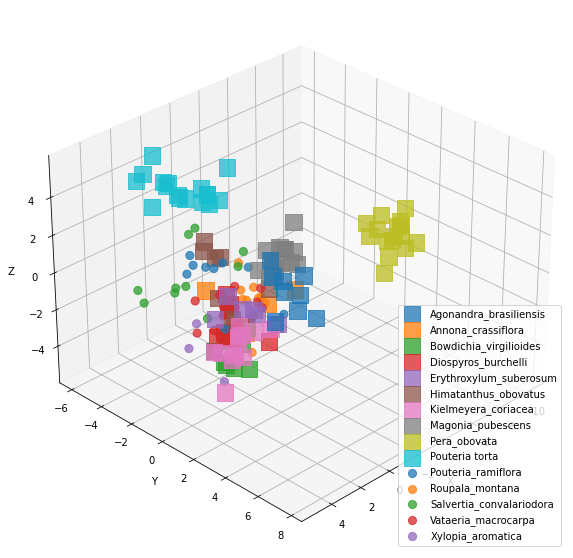

In [283]:
#GRAFICO DISPERSAO FUNCIONAL
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())


#target_names = le.fit_transform(y_test)


target_names = np.unique(y_test)
#colors = ['red', 'green', 'blue']
lw = 2
ax = plt.axes(projection ="3d")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
for i, target_name in zip(np.unique(y_test), target_names):
    mark='s'
    if target_name == 'Roupala_montana' or target_name == 'Pouteria_ramiflora' or target_name == 'Salvertia_convalariodora' or target_name == 'Vataeria_macrocarpa' or target_name == 'Xylopia_aromatica':
        mark='.'
    
    ax.scatter(X_lda[y_test == i, 0], X_lda[y_test == i, 1],X_lda[y_test == i, 2], marker=mark,s=265, alpha=0.75,
               label=target_name)

ax.view_init(30,405)
#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.rcParams["figure.figsize"]=19,10
#plt.title("Gráfico de Dispersão")

#plt.show(ax)

In [41]:
#definindo X (amostra) e y (target)
PC_nome_colunas_final = PC_nome_colunas_Hor + PC_nome_colunas_Ver + PC_nome_colunas_Dia
X = df_Final_PC[['pcHor1',
                'pcHor2',
                #'pcHor3',
                #'pcHor4',
                #'pcHor5',
               #'pcHor6',
                #'pcHor7',
                #'pcHor8',
                #'pcHor9',
                #'pcHor10',
                'pcVer1',
                'pcVer2',
                #'pcVer3',
                #'pcVer4',
                #'pcVer5',
                #'pcVer6',
                #'pcVer7',
                #'pcVer8',
                #'pcVer9',
                #'pcVer10',
                'pcDia1',
                'pcDia2',
                #'pcDia3',
                #'pcDia4',
                #'pcDia5',
                #'pcDia6',
                #'pcDia7',
                #'pcDia8',
                #'pcDia9',
               #'pcDia10'
                 #'minHor',
                 #'maxHor',
                 #'minVer',
                # 'maxVer',
                 #'minDia',
                 #'maxDia',
                 'mediaHor',
                 'mediaVer',
                 #'mediaDia',
                 #'varHor',
                 #'varVer',
                 #'varDia'
               ]]
y = df_Final_PC['especie']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle=True,random_state=42)

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3) #instancia o classificador SGD
sgd_clf.fit(X_train, y_train) #treina o classificador com os arrays de treino


y_pred = sgd_clf.predict(X_test) #inicia o processo de teste
#print(np.array(y_pred == y_test)) #imprime o array de acertos comparando as predições com a real classificação das espécies
print('')
print('Porcentagem de acertos: ', 100*np.sum(y_pred == y_test)/len(y_test)) #calcula a porcentagem de acertos somando todos os
                                                                            #valores acertados pela máquina (np.sum) e dividindo pelo 
                                                                            #número de valores totais do teste 


Porcentagem de acertos:  54.088050314465406


In [42]:
#%matplotlib notebook

In [43]:
#from matplotlib.animation import FuncAnimation

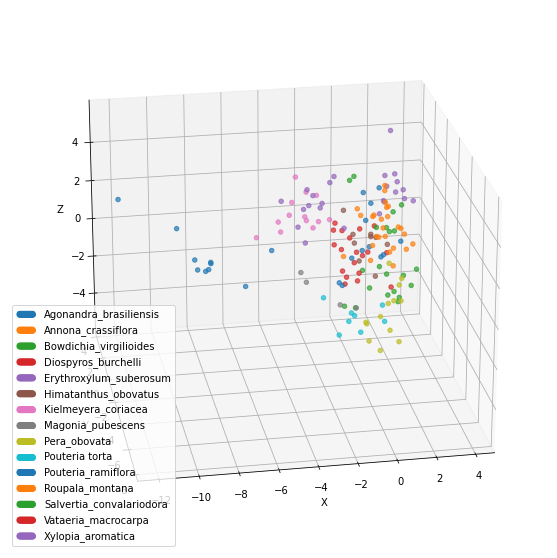

In [44]:
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()


target_names = le.fit_transform(y_test)


target_names = np.unique(y_test)
#colors = ['red', 'green', 'blue']
lw = 2
ax = plt.axes(projection ="3d")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
for i, target_name in zip(np.unique(y_test), target_names):
    ax.scatter3D(X_lda[y_test == i, 0], X_lda[y_test == i, 1],X_lda[y_test == i, 2], alpha=0.70, cmap ="binary_r",
                label=target_name)

ax.view_init(23,-100)
#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=100)
#plt.rcParams["figure.figsize"]=10,10
#plt.title("Gráfico de Dispersão")

#plt.show(ax)